Домашнее задание по 2 неделе.

# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [96]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [97]:
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.5)

In [99]:
knn = KNeighborsClassifier()

In [100]:
params = {
    'n_neighbors': [i for i in range(1, 21)], 
}

In [101]:
kf = KFold(n_splits=5, random_state=10, shuffle=True)

In [102]:
grid = GridSearchCV(knn, params, cv=kf)

In [103]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [104]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=18)

In [105]:
model = KNeighborsClassifier(n_neighbors=18)

In [106]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [107]:
y_pred = model.predict(X_test)

In [108]:
accuracy_score(y_test, y_pred)

0.798

In [109]:
best_predictions = grid.predict(X_test)

In [110]:
accuracy_score(y_test, best_predictions)

0.808

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


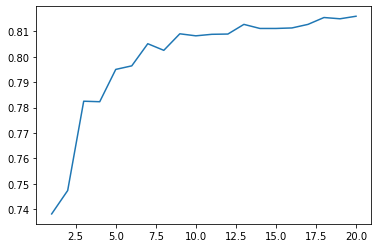

In [111]:
def train_grid_search(X, y):
    params = {
        'n_neighbors': [i for i in range(1, 21)], 
    }
    knn = KNeighborsClassifier()
    gs = GridSearchCV(estimator=knn, param_grid=params)
    gs.fit(X, y)
    return gs.cv_results_["mean_test_score"]

mean_test_scores = []
for i in range(10):
    X, y = make_moons(n_samples=1000, noise=0.5)
    mean_test_score = train_grid_search(X, y)
    mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

# Задание 3

In [112]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘dir_with_mnist_data_files’: File exists
--2022-10-19 02:56:59--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 188.114.96.3, 188.114.97.3, 2a06:98c1:3120::3, ...
Connecting to yann.lecun.com (yann.lecun.com)|188.114.96.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.04s   

2022-10-19 02:56:59 (219 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-10-19 02:56:59--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 188.114.96.3, 188.114.97.3, 2a06:98c1:3120::3, ...
Connecting to yann.lecun.com (yann.lecun.com)|188.114.96.3|:80... connected.
HTTP request 

In [113]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('./dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

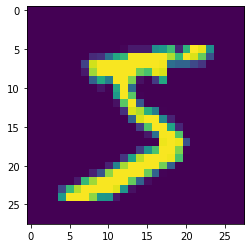

In [114]:
plt.imshow(images[0].reshape(28, 28))

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [115]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

In [116]:
knn = KNeighborsClassifier(n_neighbors=30)

In [117]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [118]:
predictions = knn.predict(X_test)

In [119]:
accuracy_score(y_test, predictions)

0.956

# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?

Ошибочный пример


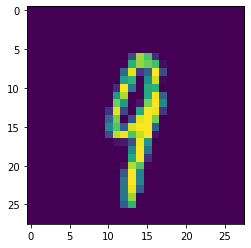

5 ближайших соседей ошибочного примера


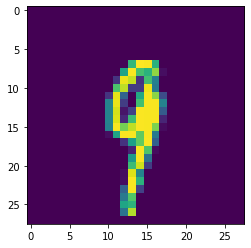

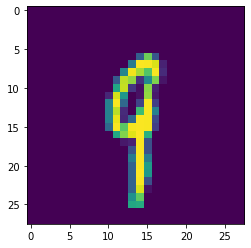

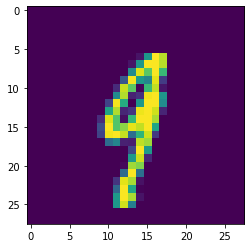

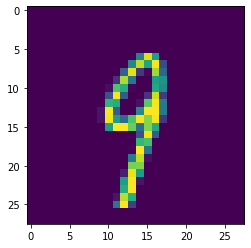

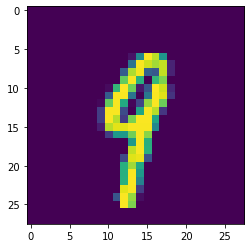

In [120]:
wrong_examples = dict()
for i in range(len(y_test)):
  if not (y_test[i] == predictions[i]):
    wrong_examples[i] = (y_test[i], predictions[i])

wrong_ex = X_test[list(wrong_examples.keys())[0]]
neighbors = knn.kneighbors([wrong_ex], n_neighbors=5)

print("Ошибочный пример")
plt.imshow(wrong_ex.reshape(28, 28))
plt.show()

print("5 ближайших соседей ошибочного примера")
for ind in neighbors[1][0]:
  plt.imshow(X_train[ind].reshape(28, 28))
  plt.show()